# Example of the aitlas toolbox in the context of object detection in remote sensing images

## Import the required packages

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from aitlas.datasets import ObjectDetectionRfiPascalDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN

## Visualize images and objects witn bounding boxes

Total number of patches: 3940


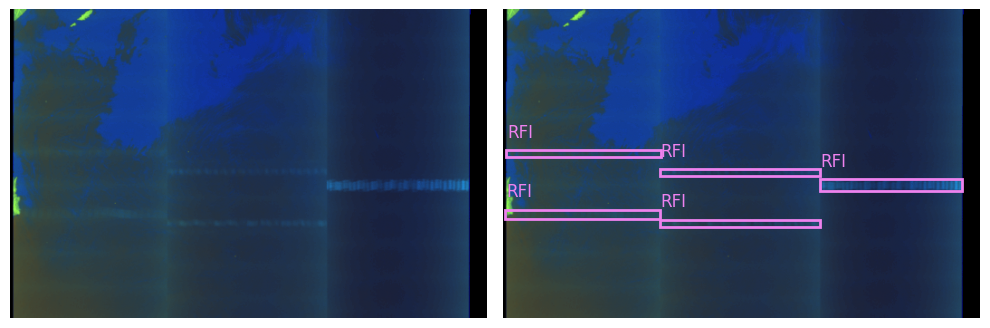

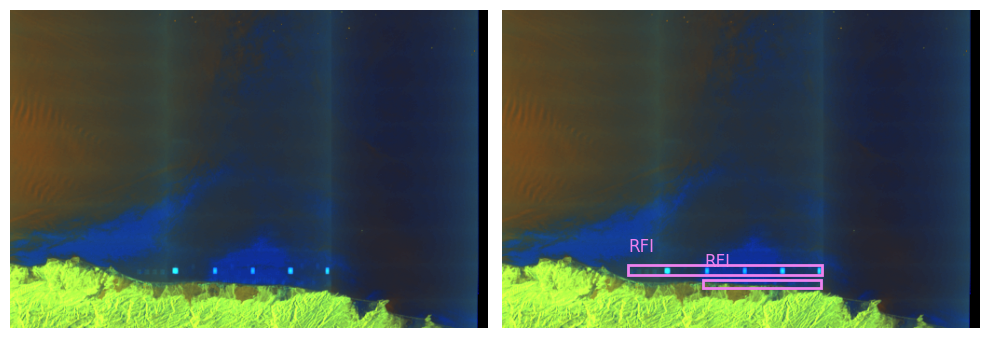

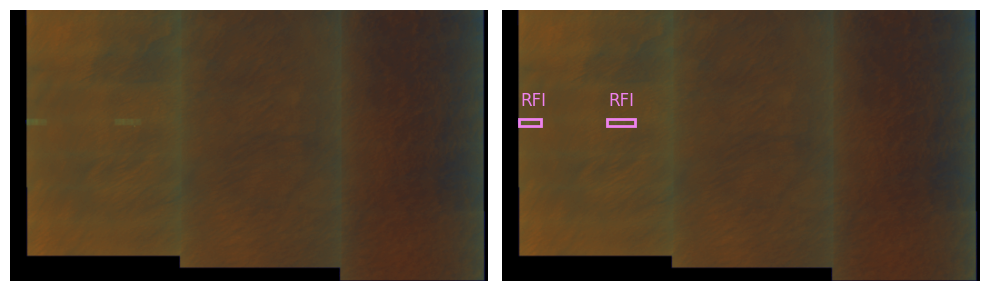

In [5]:
dataset_config = {
    "image_dir": "/home/dragik/data/rfi/rfi_final/",
    "annotations_dir": "/home/dragik/data/rfi/PASCAL_xml/",
}
dataset = ObjectDetectionRfiPascalDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(17);
dataset.show_image(800);
dataset.show_image(1200);

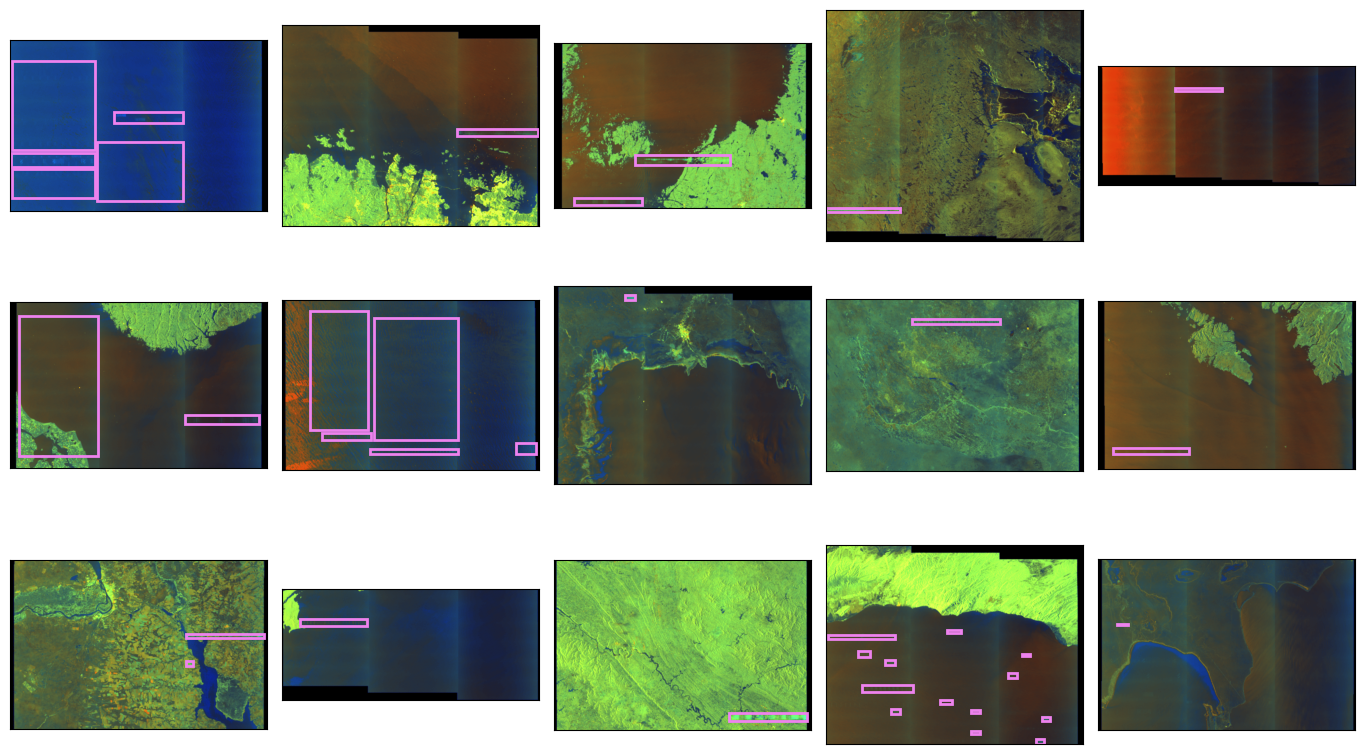

In [6]:
dataset.show_batch(15);

In [7]:
dataset.data_distribution_table()

,Label,Count
0,RFI,11724
1,Other Anomaly,301


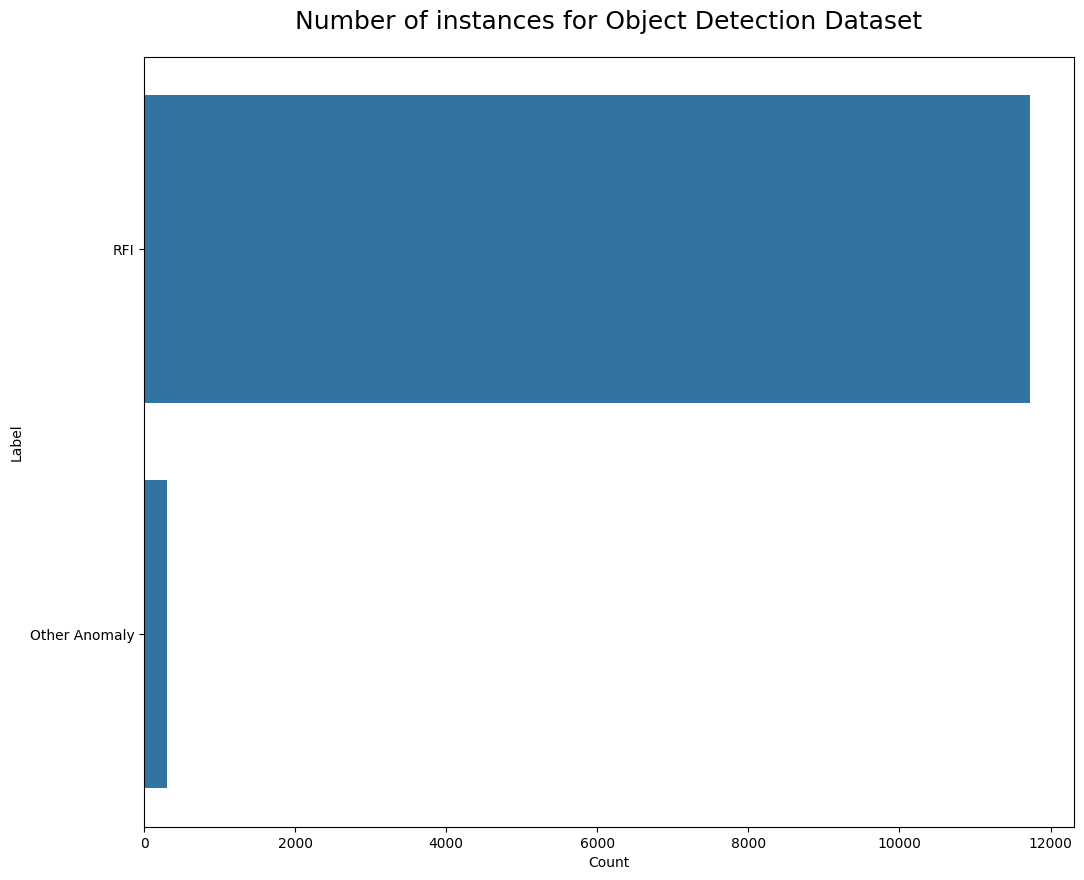

In [8]:
dataset.data_distribution_barchart();

## Load train data

In [9]:
train_dataset_config = {
    "batch_size": 8,
    "shuffle": True,
    "image_dir": "/home/dragik/data/rfi/rfi_final/",
    "annotations_dir": "/home/dragik/data/rfi/PASCAL_xml/",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}
train_dataset = ObjectDetectionRfiPascalDataset(train_dataset_config)

print(f"Total number of train images: {len(train_dataset)}")

Total number of train images: 3940


## Create the model

In [12]:
epochs = 10
model_directory = "/home/dragik/data/rfi/experiments/pascal_voc/"
model_config = {
    "num_classes": 2,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}

model = FasterRCNN(model_config)
model.prepare()

## Start the training

In [13]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:03,  3.19it/s]

[1, 100], loss:  4.25961


training:  40%|████████████████████████████▋                                          | 199/493 [01:05<01:33,  3.16it/s]

[1, 200], loss:  2.72230


training:  61%|███████████████████████████████████████████                            | 299/493 [01:36<01:01,  3.17it/s]

[1, 300], loss:  2.41208


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:08<00:29,  3.15it/s]

[1, 400], loss:  2.35332


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:38<00:00,  3.11it/s]

epoch: 1, time: 158, loss:  0.35453



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:19<00:00,  6.18it/s]


map:0.17081227898597717, map_50:0.3241376578807831, map_75:0.17052961885929108, map_small:0.15500734746456146, map_medium:0.19568179547786713, map_large:0.09793011099100113, mar_1:0.09327448159456253, mar_10:0.23362334072589874, mar_100:0.24970147013664246, mar_small:0.23160621523857117, mar_medium:0.26347872614860535, mar_large:0.26789167523384094, map_per_class:tensor(0.), tensor(0.3416), mar_100_per_class:tensor(0.), tensor(0.4994), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:31<02:04,  3.16it/s]

[2, 100], loss:  1.93332


training:  40%|████████████████████████████▋                                          | 199/493 [01:03<01:33,  3.14it/s]

[2, 200], loss:  2.29255


training:  61%|███████████████████████████████████████████                            | 299/493 [01:35<01:02,  3.08it/s]

[2, 300], loss:  2.11372


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:07<00:29,  3.14it/s]

[2, 400], loss:  2.06838


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:37<00:00,  3.13it/s]

epoch: 2, time: 158, loss:  0.26313



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:18<00:00,  6.24it/s]


map:0.18716301023960114, map_50:0.3465391993522644, map_75:0.18952441215515137, map_small:0.16950473189353943, map_medium:0.21563927829265594, map_large:0.13023412227630615, mar_1:0.09701040387153625, mar_10:0.2495223432779312, mar_100:0.2665472626686096, mar_small:0.24076952040195465, mar_medium:0.283509761095047, mar_large:0.3065764009952545, map_per_class:tensor(0.), tensor(0.3743), mar_100_per_class:tensor(0.), tensor(0.5331), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:31<02:04,  3.16it/s]

[3, 100], loss:  1.94918


training:  40%|████████████████████████████▋                                          | 199/493 [01:03<01:33,  3.16it/s]

[3, 200], loss:  1.83381


training:  61%|███████████████████████████████████████████                            | 299/493 [01:35<01:02,  3.12it/s]

[3, 300], loss:  1.93819


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:07<00:30,  3.11it/s]

[3, 400], loss:  1.97450


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:37<00:00,  3.12it/s]

epoch: 3, time: 158, loss:  0.23853



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:23<00:00,  5.92it/s]


map:0.2046530395746231, map_50:0.36888885498046875, map_75:0.20894752442836761, map_small:0.18739540874958038, map_medium:0.2269992232322693, map_large:0.16275709867477417, mar_1:0.10162913799285889, mar_10:0.2668159306049347, mar_100:0.2836019992828369, mar_small:0.26270389556884766, mar_medium:0.29492607712745667, mar_large:0.3289168179035187, map_per_class:tensor(0.), tensor(0.4093), mar_100_per_class:tensor(0.), tensor(0.5672), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:15,  2.90it/s]

[4, 100], loss:  1.68751


training:  40%|████████████████████████████▋                                          | 199/493 [01:06<01:39,  2.95it/s]

[4, 200], loss:  1.78783


training:  61%|███████████████████████████████████████████                            | 299/493 [01:40<01:04,  3.00it/s]

[4, 300], loss:  1.83708


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:13<00:31,  2.99it/s]

[4, 400], loss:  1.76996


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:44<00:00,  2.99it/s]

epoch: 4, time: 165, loss:  0.22115



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:24<00:00,  5.83it/s]


map:0.2117767035961151, map_50:0.3747158348560333, map_75:0.22397880256175995, map_small:0.20076526701450348, map_medium:0.22754286229610443, map_large:0.1901681125164032, mar_1:0.1017826646566391, mar_10:0.27375468611717224, mar_100:0.2920163869857788, mar_small:0.27846863865852356, mar_medium:0.29342034459114075, mar_large:0.3529013395309448, map_per_class:tensor(0.), tensor(0.4236), mar_100_per_class:tensor(0.), tensor(0.5840), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:32<02:08,  3.06it/s]

[5, 100], loss:  1.56714


training:  40%|████████████████████████████▋                                          | 199/493 [01:04<01:33,  3.15it/s]

[5, 200], loss:  1.58665


training:  61%|███████████████████████████████████████████                            | 299/493 [01:36<01:01,  3.14it/s]

[5, 300], loss:  1.66230


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:08<00:29,  3.16it/s]

[5, 400], loss:  1.71973


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:37<00:00,  3.12it/s]

epoch: 5, time: 158, loss:  0.20584



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:22<00:00,  5.97it/s]


map:0.2268582135438919, map_50:0.3958299160003662, map_75:0.23916038870811462, map_small:0.2099347710609436, map_medium:0.2432830035686493, map_large:0.21030430495738983, mar_1:0.10669992864131927, mar_10:0.28526100516319275, mar_100:0.3014329671859741, mar_small:0.28151026368141174, mar_medium:0.30810368061065674, mar_large:0.36648935079574585, map_per_class:tensor(0.), tensor(0.4537), mar_100_per_class:tensor(0.), tensor(0.6029), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:32<02:08,  3.06it/s]

[6, 100], loss:  1.59991


training:  40%|████████████████████████████▋                                          | 199/493 [01:04<01:33,  3.15it/s]

[6, 200], loss:  1.59198


training:  61%|███████████████████████████████████████████                            | 299/493 [01:36<01:02,  3.10it/s]

[6, 300], loss:  1.58541


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:08<00:29,  3.16it/s]

[6, 400], loss:  1.52994


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:38<00:00,  3.12it/s]

epoch: 6, time: 158, loss:  0.19909



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:22<00:00,  5.98it/s]


map:0.24123136699199677, map_50:0.4076496660709381, map_75:0.2614379823207855, map_small:0.22181692719459534, map_medium:0.26076239347457886, map_large:0.2218562811613083, mar_1:0.10959570109844208, mar_10:0.29561156034469604, mar_100:0.31133145093917847, mar_small:0.2904912829399109, mar_medium:0.3203412890434265, mar_large:0.3686170279979706, map_per_class:tensor(0.), tensor(0.4825), mar_100_per_class:tensor(0.), tensor(0.6227), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:31<02:03,  3.19it/s]

[7, 100], loss:  1.49458


training:  40%|████████████████████████████▋                                          | 199/493 [01:03<01:32,  3.17it/s]

[7, 200], loss:  1.39578


training:  61%|███████████████████████████████████████████                            | 299/493 [01:35<01:02,  3.13it/s]

[7, 300], loss:  1.55574


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:06<00:29,  3.17it/s]

[7, 400], loss:  1.49535


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:36<00:00,  3.15it/s]

epoch: 7, time: 157, loss:  0.18760



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:20<00:00,  6.12it/s]


map:0.24453754723072052, map_50:0.4130150377750397, map_75:0.26363179087638855, map_small:0.22693097591400146, map_medium:0.2644611895084381, map_large:0.21516969799995422, mar_1:0.11060218513011932, mar_10:0.2980126142501831, mar_100:0.31403103470802307, mar_small:0.29132604598999023, mar_medium:0.32443878054618835, mar_large:0.37330755591392517, map_per_class:tensor(0.), tensor(0.4891), mar_100_per_class:tensor(0.), tensor(0.6281), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:31<02:03,  3.18it/s]

[8, 100], loss:  1.38686


training:  40%|████████████████████████████▋                                          | 199/493 [01:03<01:32,  3.18it/s]

[8, 200], loss:  1.43557


training:  61%|███████████████████████████████████████████                            | 299/493 [01:34<01:01,  3.17it/s]

[8, 300], loss:  1.33167


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:06<00:29,  3.14it/s]

[8, 400], loss:  1.45636


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:36<00:00,  3.15it/s]

epoch: 8, time: 156, loss:  0.17707



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:22<00:00,  5.99it/s]


map:0.26419973373413086, map_50:0.4352191388607025, map_75:0.2919257879257202, map_small:0.24841676652431488, map_medium:0.281358540058136, map_large:0.25002431869506836, mar_1:0.11446605622768402, mar_10:0.3122910261154175, mar_100:0.32873591780662537, mar_small:0.30651506781578064, mar_medium:0.33727869391441345, mar_large:0.3954545557498932, map_per_class:tensor(0.), tensor(0.5284), mar_100_per_class:tensor(0.), tensor(0.6575), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:31<02:04,  3.17it/s]

[9, 100], loss:  1.21064


training:  40%|████████████████████████████▋                                          | 199/493 [01:03<01:32,  3.16it/s]

[9, 200], loss:  1.29329


training:  61%|███████████████████████████████████████████                            | 299/493 [01:35<01:01,  3.15it/s]

[9, 300], loss:  1.37088


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:07<00:29,  3.15it/s]

[9, 400], loss:  1.37815


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:37<00:00,  3.14it/s]

epoch: 9, time: 157, loss:  0.16581



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:21<00:00,  6.05it/s]


map:0.2720383405685425, map_50:0.44339460134506226, map_75:0.30215609073638916, map_small:0.25504547357559204, map_medium:0.28440964221954346, map_large:0.29011961817741394, mar_1:0.1161719560623169, mar_10:0.3185303509235382, mar_100:0.33345702290534973, mar_small:0.3149011731147766, mar_medium:0.33900347352027893, mar_large:0.39758220314979553, map_per_class:tensor(0.), tensor(0.5441), mar_100_per_class:tensor(0.), tensor(0.6669), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:31<02:04,  3.18it/s]

[10, 100], loss:  1.24570


training:  40%|████████████████████████████▋                                          | 199/493 [01:03<01:32,  3.16it/s]

[10, 200], loss:  1.13981


training:  61%|███████████████████████████████████████████                            | 299/493 [01:34<01:01,  3.17it/s]

[10, 300], loss:  1.26760


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:06<00:29,  3.16it/s]

[10, 400], loss:  1.38642


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:36<00:00,  3.16it/s]

epoch: 10, time: 156, loss:  0.15891



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:21<00:00,  6.03it/s]


map:0.2817041575908661, map_50:0.44980481266975403, map_75:0.3197527229785919, map_small:0.26449188590049744, map_medium:0.2971253991127014, map_large:0.30180785059928894, mar_1:0.11869668960571289, mar_10:0.3259425163269043, mar_100:0.34101414680480957, mar_small:0.32005372643470764, mar_medium:0.34833911061286926, mar_large:0.40783366560935974, map_per_class:tensor(0.), tensor(0.5634), mar_100_per_class:tensor(0.), tensor(0.6820), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)
Train loss: [0.8291877210140228, 0.8128369897603989, 0.7953469604253769, 0.7882232964038849, 0.7731417864561081, 0.7587686330080032, 0.7554624527692795, 0.7358002662658691, 0.7279616594314575, 0.7182958424091339]
Validation loss: []
Train time per epochs: [158, 158, 158, 165, 158, 158, 157, 156, 157, 156]
Finished training. training time: 1581
